# DataGeometry objects (`geo`)

The DataGeometry object is the hypertools data object class. A `geo` contains the data, figure handles, and transform functions used to create a plot. Note that this class should not be called directly, but is used by the hyp.plot function to create a plot object.

In this tutorial we will explore the features of a geo and how it may be used.

## Import Hypertools

In [1]:
import hypertools as hyp
import seaborn as sb

%matplotlib inline

## Load your data

In this case, we have used one of the sample datasets built into the package.

In [2]:
geo = hyp.load('mushrooms')

## Plot it

We can plot a `geo` by calling the plot method

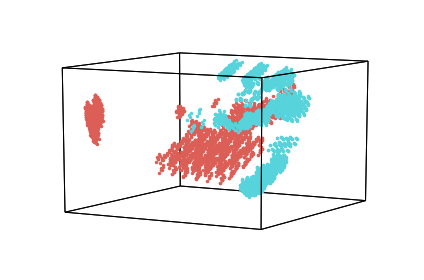

In [8]:
geo.plot()

## Exploring the geo

### Hypertools version

The version field contains the version number of hypertools that the geo was generated with.

In [9]:
geo.version

'0.4.2'

### Data and plot

The data field contains the raw data.

In [10]:
geo.data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


### Transformed data

The `xform_data` field contains the data that have been transformed according to the user-specified normalize, reduce, and align options (in this case, the data was automatically reduced to 3 dimensions for plotting when we called `hyp.plot`).

In [13]:
geo.xform_data

[array([[ 1.30051954,  0.29550253,  1.128519  ],
        [ 1.36797007, -0.2888117 ,  1.8208044 ],
        [ 1.59215354, -0.26831319,  1.66597598],
        ...,
        [ 0.40885079,  0.12732114,  0.41722945],
        [-0.89380986,  1.72804909, -0.56610268],
        [ 0.38867308,  0.10699673,  0.58651432]])]

### Normalize, reduce and align metadata

The `reduce`, `align` and `normalize` fields contain information about the model and parameters used in each of the  analyses. 

The reduce and align fields contain dictionaries with the model information and the normalize field contains a string.

In [14]:
print(geo.normalize)
print(geo.reduce)
print(geo.align)

None
{'model': 'IncrementalPCA', 'params': {'n_components': 3}}
{'model': None, 'params': {}}


### Plotting axes and animations

The `ax` and `line_ani` fields hold the plot axes and the animation setting (in this case None) for plotting, respectively.

To read more about the plot axes and line animation objects and their utility, see the matlplotlib documentation for [axes](http://matplotlib.org/api/axes_api.html) and [animations](http://matplotlib.org/api/animation_api.html), respectively.

In [15]:
geo.ax

In [16]:
geo.line_ani

## Plotting with geos

You can also generate a new plot (a new geo) from data stored in the geo using geo.plot.

This plotting feature accepts all of the keyword arguments supported by hypertools.plot.

First, let's plot without making any changes.

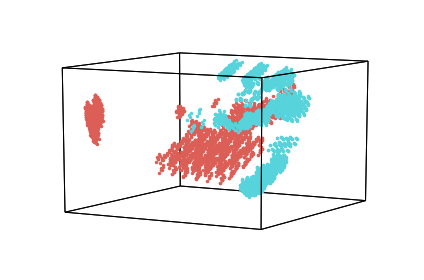

In [17]:
geo.plot()

Now, let's change the plot using some keyword arguments.

In the example below, the data are re-transformed using all of the same options as in the original plot, but with the number of dimensions specified by the reduce model set to 2.

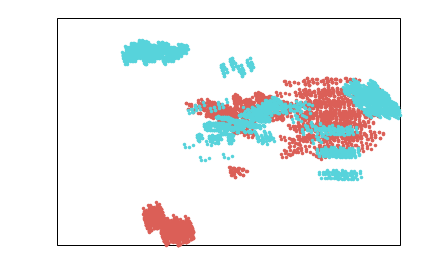

In [18]:
geo.plot(ndims = 2)

## Tranforming data using geos

An additional feature afforded by geos is the ability to later analyze other datasets using the same transformations performed on the original data in the geo. That is, whatever normalization, alignment, and reduction parameters were used on the original data in the geo can be quickly and easily applied to any new dataset using a single line of code! 


This allows for easy comparison of multiple datasets. Here, we load a built in dataset (the weights dataset) and apply the transform from the geo data to the first element of weights.

In [21]:
weights = hyp.load('weights_avg').get_data()
transformed = geo.transform(weights)

We can use heatmaps to visualized an element of the new data before and after it has been transformed by the same means as the geo data.

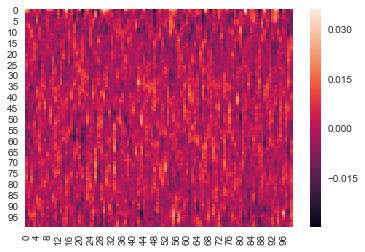

In [22]:
ax = sb.heatmap(weights[0])

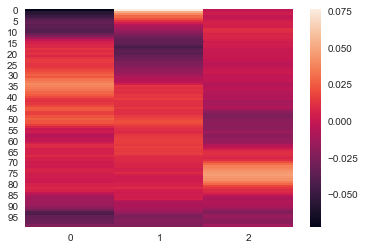

In [23]:
ax = sb.heatmap(transformed[0])

## Saving geos

You can also easily save a geo using geo.save. The geo will save as a 'geo' file, which is a dictionary containing the elements of a data geometry object saved in the hd5 format using deepdish.

To specify the compression type, pass a string to the compression argument, as below.  See the deepdish documentation for the full list of compression options: http://deepdish.readthedocs.io/en/latest/api_io.html#deepdish.io.save

In [ ]:
# geo.save('MyGeoFile')
# geo.save('MyGeoFile', compression = 'blosc')